In [27]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

The actual probability of winning is 0.25


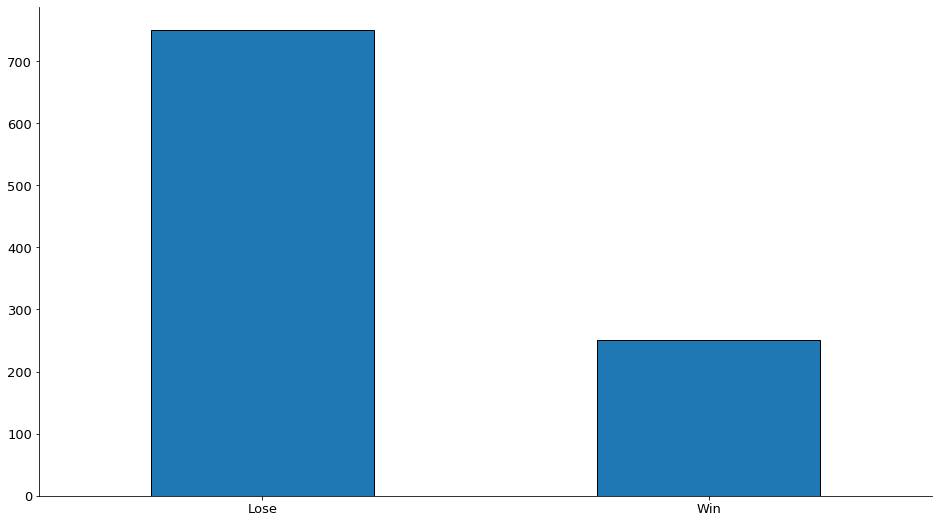

In [3]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

In [4]:
n = 25
tickets.sample(n).mean()

0.12

In [5]:
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

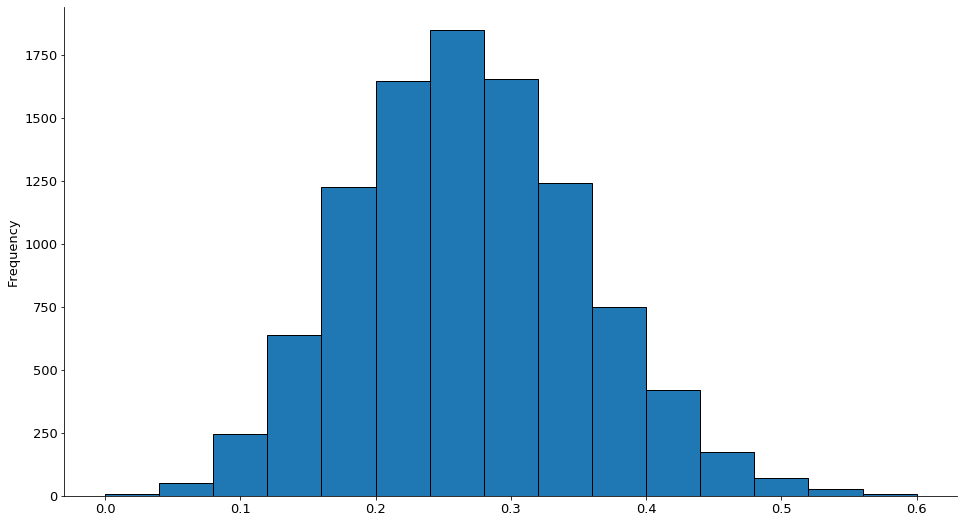

In [6]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

In [7]:
n_trials = nrows = 10_000
n_dice = ncols = 6

rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
rolls

array([[3, 1, 4, 2, 5, 2],
       [6, 4, 3, 4, 5, 5],
       [4, 3, 6, 4, 5, 4],
       ...,
       [2, 1, 5, 3, 4, 4],
       [1, 1, 4, 4, 5, 5],
       [5, 1, 4, 6, 4, 6]])

In [8]:
rolls.sum(axis=1).mean()

20.9906

In [9]:
df = pd.DataFrame(rolls)

In [10]:
df.sum(axis=1).mean()

20.9906

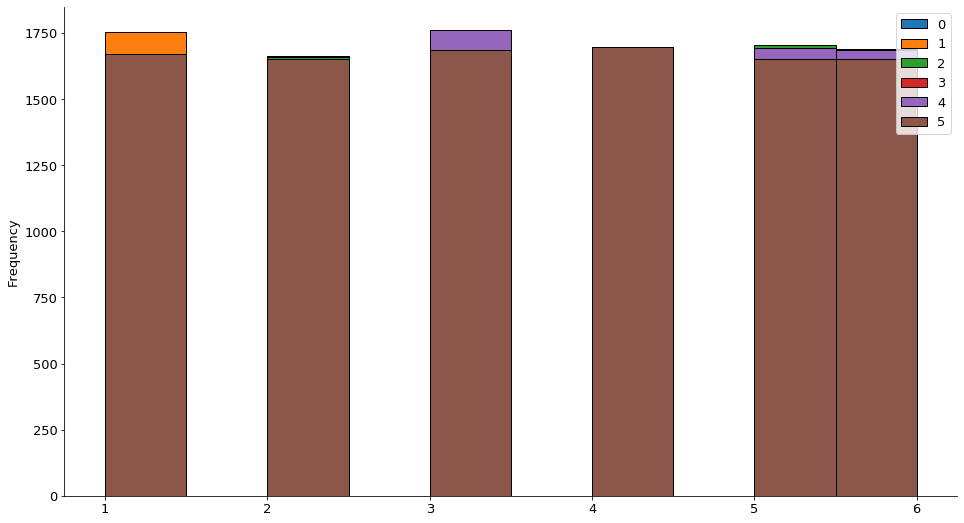

In [15]:

df.plot.hist()

In [16]:
se = math.sqrt((.25 * .75) / n)

In [17]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0857


In [18]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

Are the average grades in web development vs data science classes different?
Null-There is no difference in average grades in web dev vs. data science.
Alt-There is a significant difference in grades between the two programs.
True Positive-We reject null hypothesis. There is a difference in grades.
True Negative-There is no difference in grades between the programs.
Type I Error-We incorrectly affirmed the null hypothesis because there actually is a diff but we didn't recognize it.
Type II Error-We incorrectly rejected the null hypothesis, saying there was a difference between programs when there actually wasn't

Is there a relationship between how early a student shows up to class and their grade?
Null-There is no relationship between how early a student shows up to class and their grade.
Alt-How early a student shows up does have a significant effect on their grade.
True Positive- We reject null hypothesis, how early a student gets up does effect their grade.
True Negative- There is no relationship between how early a student shows up to class and their grade.
Type I Error- We incorrectly affirmed the null hypothesis because there was a significant relationship and we didn't recognize it.
Type II Error- We incorrectly rejected the null hypothesis, saying there was a relationship when there actually wasn't.

Are web dev or data science students more likely to be coffee drinkers?
Null-Web dev or ds students are not more likely to be coffee drinkers compared to the general population.
Alt-Web dev or ds students are significantly more likely to be coffee drinkers vs the general population.
True Positive-We reject the null, Web dev and ds are in fact more likely to be coffee drinkers than the general population.
True Negative-There is no evidence to support that Codeup students are more likely to drink coffee.
Type I Error-We incorrectly affirmed the null because there was evidence to affirm and we didn't see it.
Type II Error-We incorrectly rejected the null hypothesis, saying there was evidence and there actually wasn't. 

Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [20]:
from pydataset import data

mpg = data('mpg')

In [21]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [53]:
mpg['combined_mileage'] = (mpg.cty + mpg.hwy) / 2 

In [54]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,combined_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


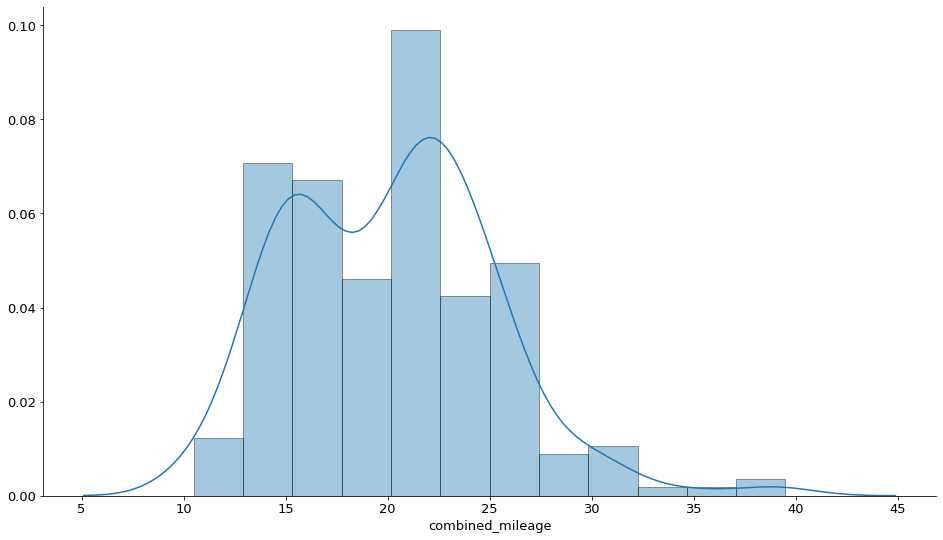

In [55]:
sns.distplot(mpg.combined_mileage)


In [56]:
two_thousand_eight = mpg[mpg.year== 2008].combined_mileage
nineteen_ninetynine = mpg[mpg.year== 1999].combined_mileage

In [57]:
alpha = .05

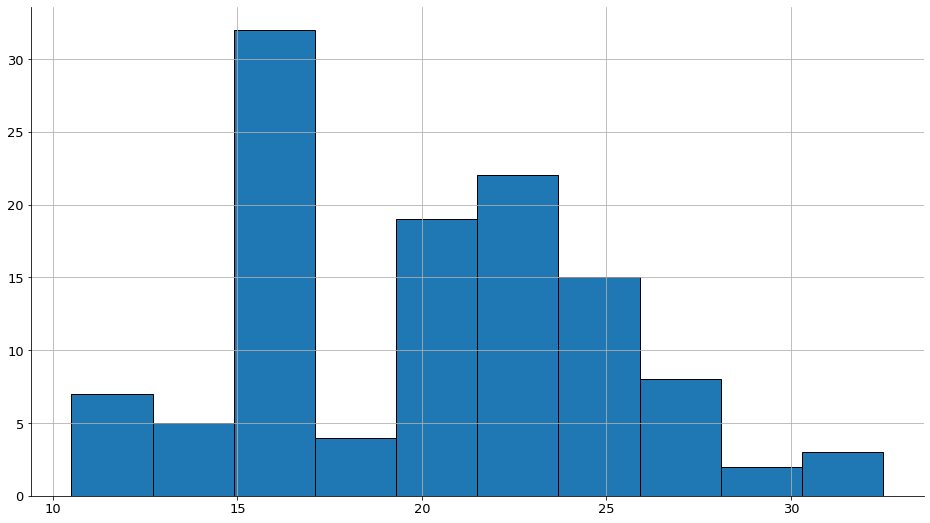

In [58]:
two_thousand_eight.hist()

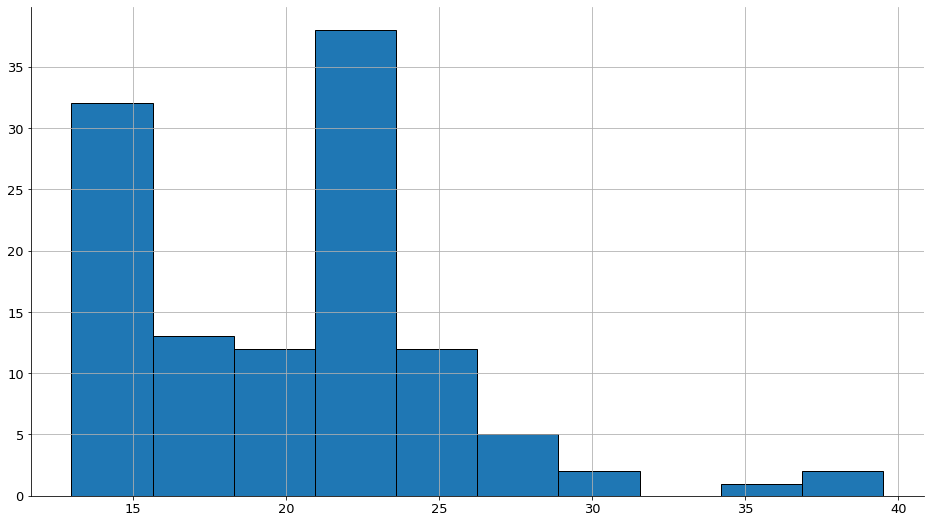

In [59]:
nineteen_ninetynine.hist()

In [60]:
print(two_thousand_eight.var())
print(nineteen_ninetynine.var())

24.097480106100797
27.122605363984682


In [61]:
t, p = stats.ttest_ind(two_thousand_eight, nineteen_ninetynine)

In [62]:
t


-0.21960177245940962

In [63]:
p

0.8263744040323578

In [64]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We fail to reject $H_{0}$


In [65]:
compact = mpg[mpg['class'] == 'compact'].combined_mileage
overall = mpg.combined_mileage

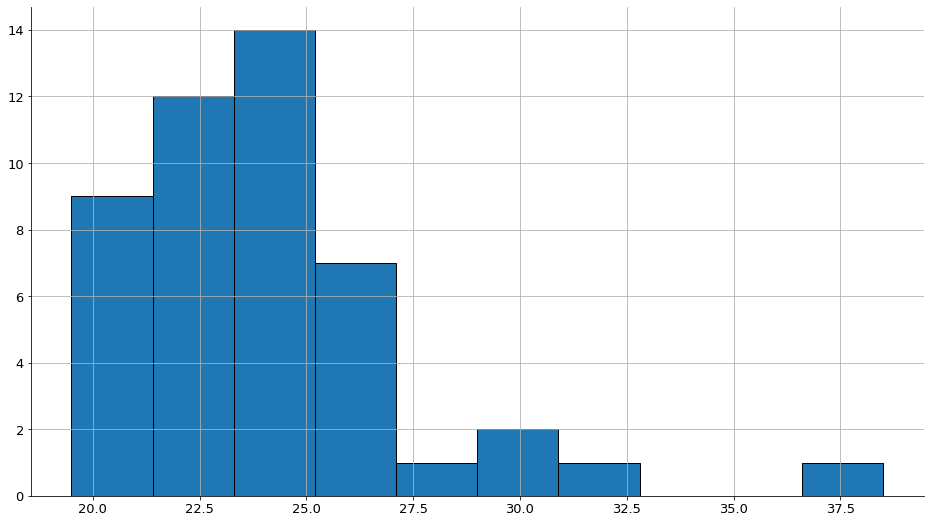

In [66]:
compact.hist()

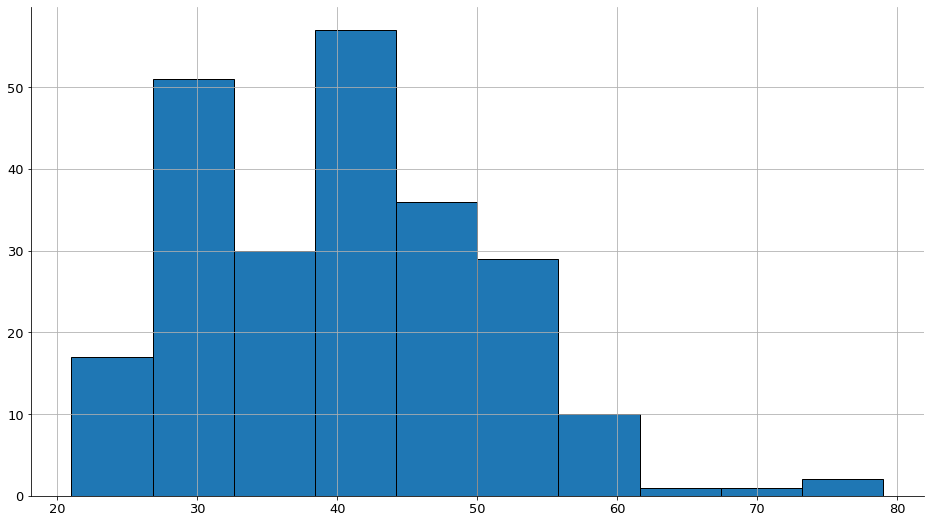

In [51]:
overall.hist()

In [67]:
print(compact.var())
print(overall.var())

12.442876965772433
25.50542900113715


In [68]:
t, p = stats.ttest_ind(compact, overall)


In [69]:
t

5.260311926248542

In [70]:
p

2.8684546158129373e-07

In [71]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [72]:
p/2

1.4342273079064686e-07

In [77]:
manual = mpg[mpg.trans.str.startswith('m')].combined_mileage

In [79]:
manual.head()

2     25.0
3     25.5
6     22.0
8     22.0
10    24.0
Name: combined_mileage, dtype: float64

In [80]:
auto = mpg[mpg.trans.str.startswith('a')].combined_mileage

In [81]:
auto.head()

1    23.5
4    25.5
5    21.0
7    22.5
9    20.5
Name: combined_mileage, dtype: float64

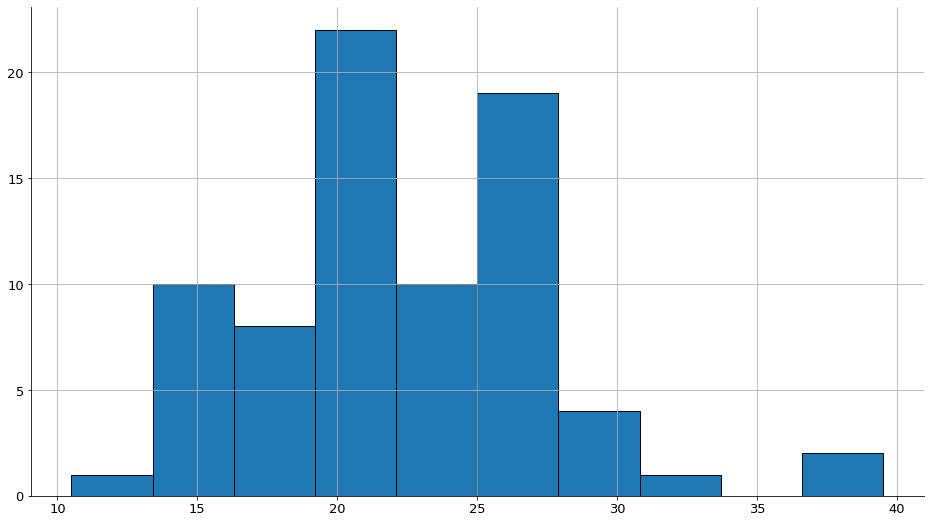

In [83]:
manual.hist()

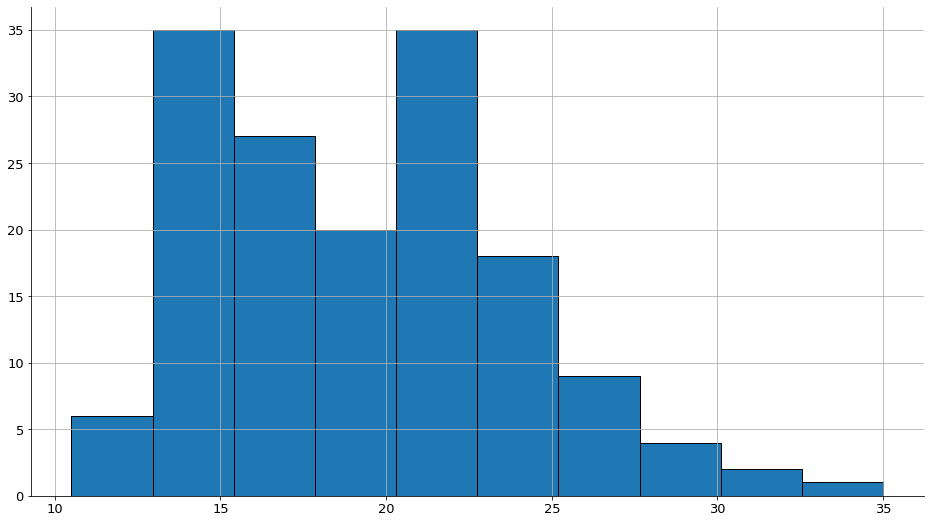

In [84]:
auto.hist()

In [85]:
print(manual.var())
print(auto.var())

26.635167464114826
21.942777233382337


In [86]:
t, p = stats.ttest_ind(compact, overall)


In [87]:
t

5.260311926248542

In [88]:
p

2.8684546158129373e-07

In [89]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.